# Day 81 - Introduction to Transformer Architecture and Attention Mechanisms

## Introduction

Welcome to Day 81 of the 100 Days of Machine Learning! Today marks an exciting milestone as we dive into one of the most revolutionary architectures in modern machine learning: the Transformer.

The Transformer architecture, introduced in the landmark 2017 paper "Attention is All You Need" by Vaswani et al., has fundamentally transformed the field of natural language processing (NLP) and beyond. Unlike previous sequence-to-sequence models that relied heavily on recurrent neural networks (RNNs) and LSTMs, transformers use a mechanism called **attention** to process entire sequences in parallel, leading to dramatic improvements in both performance and training efficiency.

### Why Transformers Matter

Transformers have become the backbone of state-of-the-art models in:
- **Natural Language Processing**: BERT, GPT, T5, and many others
- **Computer Vision**: Vision Transformers (ViT), DETR
- **Speech Recognition**: Wav2Vec, Whisper
- **Multi-modal Learning**: CLIP, DALL-E

Understanding transformers is essential for anyone working with modern AI systems, as they power everything from chatbots to language translation, text summarization to code generation.

### Learning Objectives

By the end of this lesson, you will be able to:
1. Understand the core concept of attention mechanisms and why they're important
2. Explain the mathematical foundations of scaled dot-product attention
3. Implement a simple attention mechanism from scratch in Python
4. Visualize attention weights to interpret model behavior
5. Recognize the key components of the transformer architecture

## Theory: Understanding Attention Mechanisms

### The Problem with Sequential Models

Before transformers, sequence modeling was dominated by Recurrent Neural Networks (RNNs) and their variants like LSTMs and GRUs. These models processed sequences step-by-step, which created several limitations:

1. **Sequential Processing**: Cannot parallelize computation across the sequence
2. **Long-Range Dependencies**: Struggle to capture relationships between distant elements
3. **Vanishing Gradients**: Information from early tokens can be lost in long sequences

### The Attention Mechanism: A Revolutionary Idea

Attention mechanisms allow models to focus on different parts of the input when producing each part of the output. Think of it like reading a sentence: when you try to understand a word, you don't just look at the previous word—you consider the entire context.

**Key Insight**: Instead of compressing all information into a fixed-size hidden state, attention lets the model directly access all input positions with learned weights.

### Types of Attention

1. **Self-Attention**: A sequence attends to itself (each word looks at all other words)
2. **Cross-Attention**: One sequence attends to another (e.g., decoder attending to encoder)
3. **Multi-Head Attention**: Multiple attention mechanisms running in parallel

### The Attention Formula

The core of the attention mechanism can be expressed mathematically using three components:

- **Query (Q)**: What we're looking for
- **Key (K)**: What we're comparing against
- **Value (V)**: What we actually retrieve

The **scaled dot-product attention** is computed as:

$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$

Where:
- $Q \in \mathbb{R}^{n \times d_k}$ is the query matrix
- $K \in \mathbb{R}^{m \times d_k}$ is the key matrix
- $V \in \mathbb{R}^{m \times d_v}$ is the value matrix
- $d_k$ is the dimension of the keys (used for scaling)
- $n$ is the sequence length for queries
- $m$ is the sequence length for keys/values

### Breaking Down the Formula

Let's understand each step:

1. **$QK^T$**: Compute similarity scores between queries and keys
   - Results in a matrix of shape $(n \times m)$
   - Each element $(i,j)$ represents how much query $i$ should attend to key $j$

2. **$\frac{1}{\sqrt{d_k}}$**: Scale the scores
   - Prevents the dot products from becoming too large
   - Keeps gradients stable during training
   - Without scaling, softmax would produce very sharp distributions

3. **$\text{softmax}$**: Convert scores to probabilities
   - Each row sums to 1
   - Represents attention weights: how much to focus on each position

4. **Multiply by $V$**: Weighted sum of values
   - Combines information based on attention weights
   - Output shape: $(n \times d_v)$

### Why This Works

The attention mechanism is powerful because:
- It's **differentiable**: can be trained end-to-end with backpropagation
- It's **parallelizable**: all attention computations can happen simultaneously
- It's **flexible**: can capture both local and global dependencies
- It's **interpretable**: attention weights show what the model is focusing on

## Python Implementation

Now let's implement the attention mechanism from scratch to truly understand how it works. We'll build it step by step, starting with the basic components.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import softmax

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
NumPy version: 2.3.4


### Step 1: Implementing Scaled Dot-Product Attention

Let's implement the core attention function following the formula we discussed.

In [2]:
def scaled_dot_product_attention(Q, K, V, mask=None):
    """
    Compute scaled dot-product attention.
    
    Parameters:
    -----------
    Q : ndarray of shape (n, d_k)
        Query matrix
    K : ndarray of shape (m, d_k)
        Key matrix
    V : ndarray of shape (m, d_v)
        Value matrix
    mask : ndarray of shape (n, m), optional
        Attention mask (1 for positions to attend, 0 to ignore)
    
    Returns:
    --------
    output : ndarray of shape (n, d_v)
        Attention output
    attention_weights : ndarray of shape (n, m)
        Attention weight matrix
    """
    # Get the dimension of keys for scaling
    d_k = K.shape[1]
    
    # Step 1: Compute attention scores (Q @ K^T)
    scores = np.matmul(Q, K.T)
    
    # Step 2: Scale by sqrt(d_k)
    scores = scores / np.sqrt(d_k)
    
    # Step 3: Apply mask if provided
    if mask is not None:
        scores = np.where(mask == 0, -1e9, scores)
    
    # Step 4: Apply softmax to get attention weights
    attention_weights = softmax(scores, axis=-1)
    
    # Step 5: Apply attention weights to values
    output = np.matmul(attention_weights, V)
    
    return output, attention_weights

print("Scaled dot-product attention function implemented!")

Scaled dot-product attention function implemented!


### Step 2: Create Example Data

Let's create a simple example to see attention in action. We'll simulate a short sequence with meaningful embeddings.

In [3]:
# Simulate a sequence of 5 tokens with embedding dimension of 8
seq_length = 5
d_model = 8

# Create random embeddings for our sequence
# In practice, these would come from an embedding layer
X = np.random.randn(seq_length, d_model)

# For self-attention, Q, K, and V are all derived from the same input
# In practice, these would be learned linear transformations
# For simplicity, we'll use the input directly
Q = X
K = X
V = X

print("Input sequence shape:", X.shape)
print("\nFirst token embedding:")
print(X[0])
print("\nQuery matrix shape:", Q.shape)
print("Key matrix shape:", K.shape)
print("Value matrix shape:", V.shape)

Input sequence shape: (5, 8)

First token embedding:
[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473]

Query matrix shape: (5, 8)
Key matrix shape: (5, 8)
Value matrix shape: (5, 8)


### Step 3: Compute Attention

Now let's apply our attention function and examine the results.

In [4]:
# Compute attention
output, attention_weights = scaled_dot_product_attention(Q, K, V)

print("Attention output shape:", output.shape)
print("Attention weights shape:", attention_weights.shape)
print("\nAttention weights matrix:")
print(attention_weights)
print("\nSum of attention weights per query (should be 1.0):")
print(attention_weights.sum(axis=1))

Attention output shape: (5, 8)
Attention weights shape: (5, 5)

Attention weights matrix:
[[0.8249209  0.02177969 0.01837486 0.09971847 0.03520608]
 [0.00822782 0.58054169 0.1078316  0.05109566 0.25230324]
 [0.00859621 0.13353545 0.77711088 0.0185098  0.06224765]
 [0.0872547  0.11834897 0.03462037 0.67634031 0.08343563]
 [0.01124043 0.21323346 0.042482   0.03044413 0.70259998]]

Sum of attention weights per query (should be 1.0):
[1. 1. 1. 1. 1.]


## Visualizing Attention

One of the most powerful aspects of attention mechanisms is their interpretability. We can visualize the attention weights to understand what the model is focusing on.

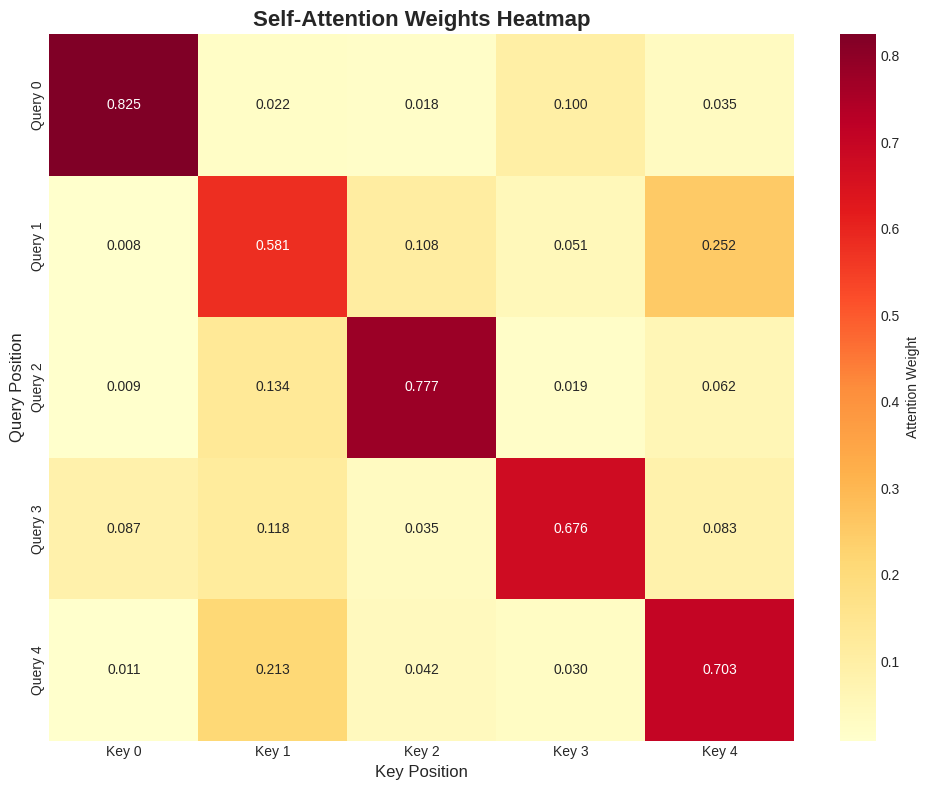


Interpretation:
- Each row shows how much a query position attends to all key positions
- Brighter colors indicate stronger attention
- Each row sums to 1.0 (probability distribution)


In [5]:
# Create a heatmap of attention weights
plt.figure(figsize=(10, 8))
sns.heatmap(attention_weights, 
            annot=True, 
            fmt='.3f', 
            cmap='YlOrRd',
            xticklabels=[f'Key {i}' for i in range(seq_length)],
            yticklabels=[f'Query {i}' for i in range(seq_length)],
            cbar_kws={'label': 'Attention Weight'})

plt.title('Self-Attention Weights Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Key Position', fontsize=12)
plt.ylabel('Query Position', fontsize=12)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Each row shows how much a query position attends to all key positions")
print("- Brighter colors indicate stronger attention")
print("- Each row sums to 1.0 (probability distribution)")

### Real-World Example: Sentence Attention

Let's create a more intuitive example using a simple sentence to see how attention might work in practice.

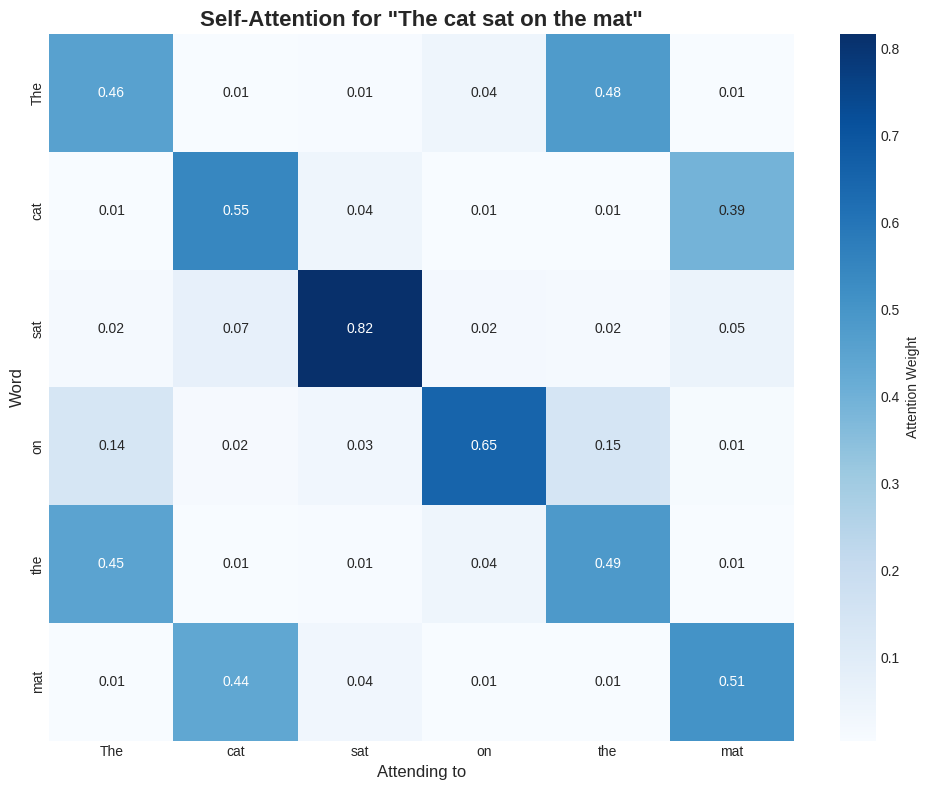


Analysis of attention patterns:
The    pays most attention to 'the' (weight: 0.479)
cat    pays most attention to 'cat' (weight: 0.546)
sat    pays most attention to 'sat' (weight: 0.816)
on     pays most attention to 'on' (weight: 0.653)
the    pays most attention to 'the' (weight: 0.486)
mat    pays most attention to 'mat' (weight: 0.507)


In [6]:
# Example sentence: "The cat sat on the mat"
sentence = ["The", "cat", "sat", "on", "the", "mat"]
seq_len = len(sentence)

# Create simple word embeddings (in practice, these would be learned)
# We'll create embeddings that reflect semantic similarity
np.random.seed(42)
word_embeddings = np.random.randn(seq_len, 16)

# Make "The" (index 0) and "the" (index 4) similar
word_embeddings[4] = word_embeddings[0] + np.random.randn(16) * 0.1

# Make "cat" and "mat" somewhat similar (both nouns)
word_embeddings[5] = word_embeddings[1] + np.random.randn(16) * 0.3

# Compute self-attention for this sentence
sent_output, sent_attention = scaled_dot_product_attention(
    word_embeddings, word_embeddings, word_embeddings
)

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(sent_attention, 
            annot=True, 
            fmt='.2f', 
            cmap='Blues',
            xticklabels=sentence,
            yticklabels=sentence,
            cbar_kws={'label': 'Attention Weight'})

plt.title('Self-Attention for "The cat sat on the mat"', fontsize=16, fontweight='bold')
plt.xlabel('Attending to', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.tight_layout()
plt.show()

print("\nAnalysis of attention patterns:")
for i, word in enumerate(sentence):
    max_attention_idx = np.argmax(sent_attention[i])
    max_attention_word = sentence[max_attention_idx]
    max_attention_score = sent_attention[i][max_attention_idx]
    print(f"{word:6s} pays most attention to '{max_attention_word}' (weight: {max_attention_score:.3f})")

## Multi-Head Attention

Transformers don't use just one attention mechanism—they use multiple "heads" of attention running in parallel. This allows the model to attend to different types of relationships simultaneously.

### The Multi-Head Attention Formula

$$\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, ..., \text{head}_h)W^O$$

where each head is:

$$\text{head}_i = \text{Attention}(QW^Q_i, KW^K_i, VW^V_i)$$

Here:
- $W^Q_i, W^K_i, W^V_i$ are learned projection matrices for head $i$
- $W^O$ is the output projection matrix
- $h$ is the number of attention heads

### Why Multiple Heads?

Different heads can learn to focus on different aspects:
- One head might focus on syntactic relationships
- Another might capture semantic similarity
- Yet another might learn positional patterns

In [7]:
def multi_head_attention(Q, K, V, num_heads=4):
    """
    Simple implementation of multi-head attention.
    
    Parameters:
    -----------
    Q, K, V : ndarray
        Query, Key, Value matrices
    num_heads : int
        Number of attention heads
    
    Returns:
    --------
    output : ndarray
        Multi-head attention output
    all_attention_weights : list
        Attention weights from each head
    """
    d_model = Q.shape[1]
    d_k = d_model // num_heads
    
    # Store outputs and attention weights from each head
    head_outputs = []
    all_attention_weights = []
    
    for h in range(num_heads):
        # In practice, we would use learned projections
        # Here we simply split the dimensions
        start_idx = h * d_k
        end_idx = (h + 1) * d_k
        
        Q_h = Q[:, start_idx:end_idx]
        K_h = K[:, start_idx:end_idx]
        V_h = V[:, start_idx:end_idx]
        
        # Compute attention for this head
        head_out, head_attn = scaled_dot_product_attention(Q_h, K_h, V_h)
        
        head_outputs.append(head_out)
        all_attention_weights.append(head_attn)
    
    # Concatenate outputs from all heads
    output = np.concatenate(head_outputs, axis=-1)
    
    return output, all_attention_weights

# Test multi-head attention
num_heads = 4
mh_output, mh_attention_weights = multi_head_attention(X, X, X, num_heads=num_heads)

print(f"Multi-head attention with {num_heads} heads")
print(f"Output shape: {mh_output.shape}")
print(f"Number of attention weight matrices: {len(mh_attention_weights)}")
print(f"Each attention weight matrix shape: {mh_attention_weights[0].shape}")

Multi-head attention with 4 heads
Output shape: (5, 8)
Number of attention weight matrices: 4
Each attention weight matrix shape: (5, 5)


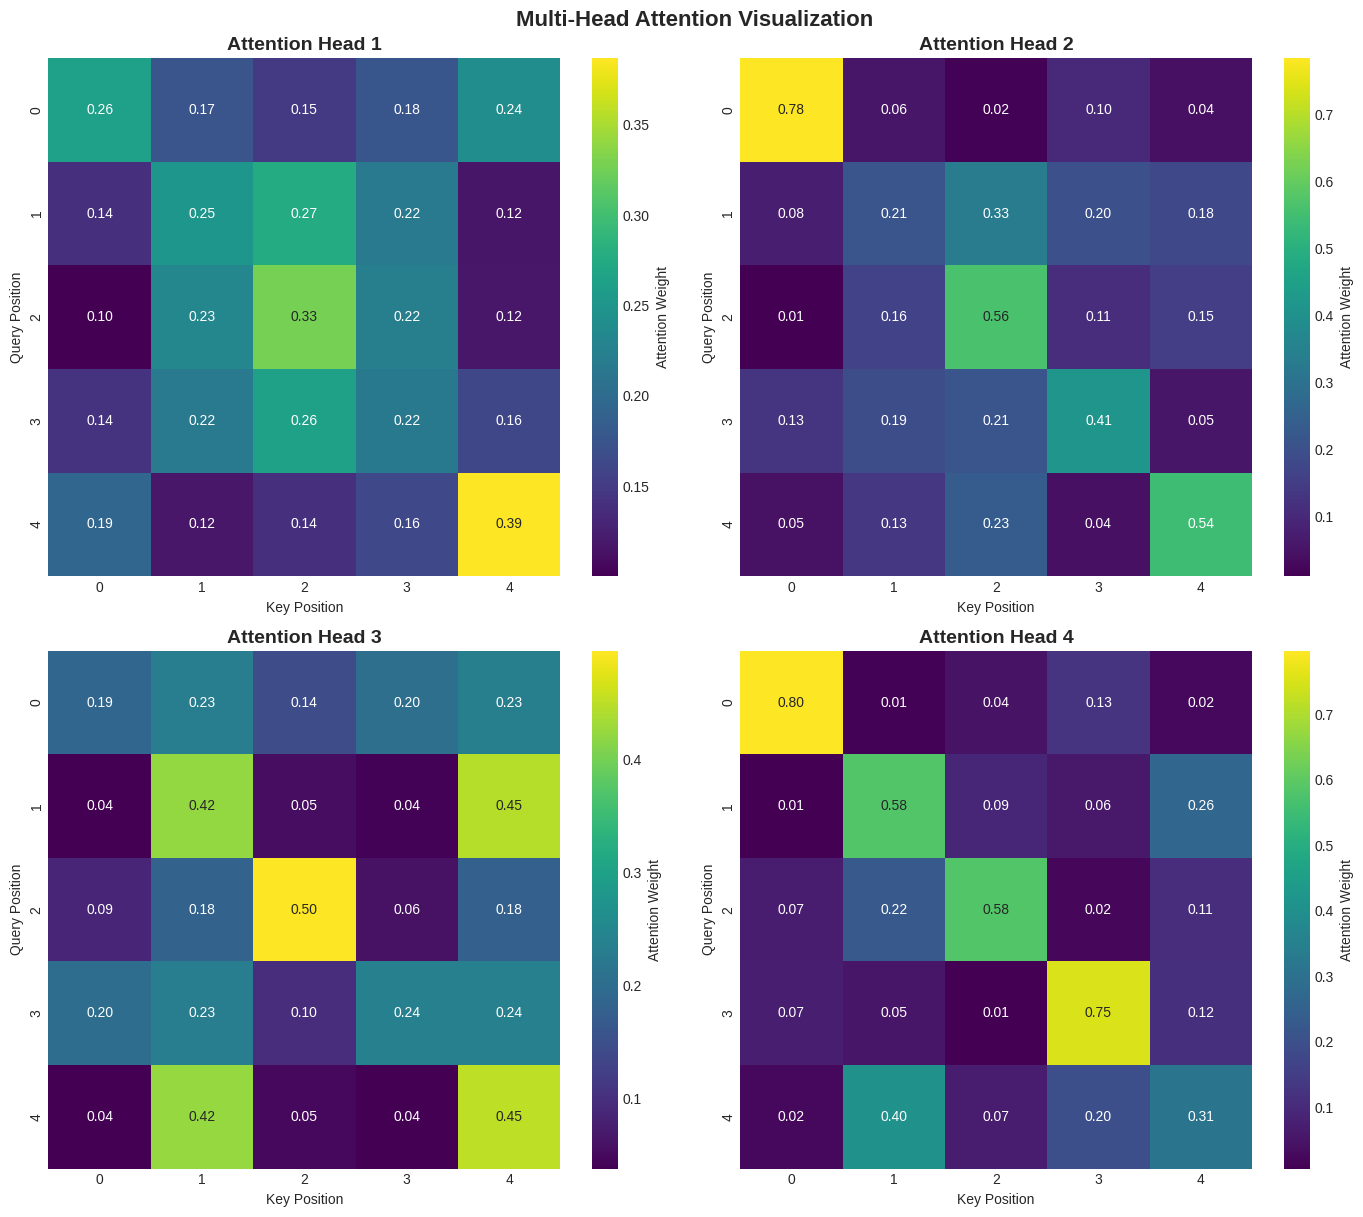


Notice how different heads learn different attention patterns!
This diversity allows the model to capture various types of relationships.


In [8]:
# Visualize attention from multiple heads
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, (ax, attn_weights) in enumerate(zip(axes, mh_attention_weights)):
    sns.heatmap(attn_weights, 
                annot=True, 
                fmt='.2f', 
                cmap='viridis',
                ax=ax,
                cbar_kws={'label': 'Attention Weight'})
    ax.set_title(f'Attention Head {i+1}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Key Position')
    ax.set_ylabel('Query Position')

plt.tight_layout()
plt.suptitle('Multi-Head Attention Visualization', fontsize=16, fontweight='bold', y=1.01)
plt.show()

print("\nNotice how different heads learn different attention patterns!")
print("This diversity allows the model to capture various types of relationships.")

## Understanding the Scaling Factor

Let's demonstrate why we need the $\frac{1}{\sqrt{d_k}}$ scaling factor in the attention formula.

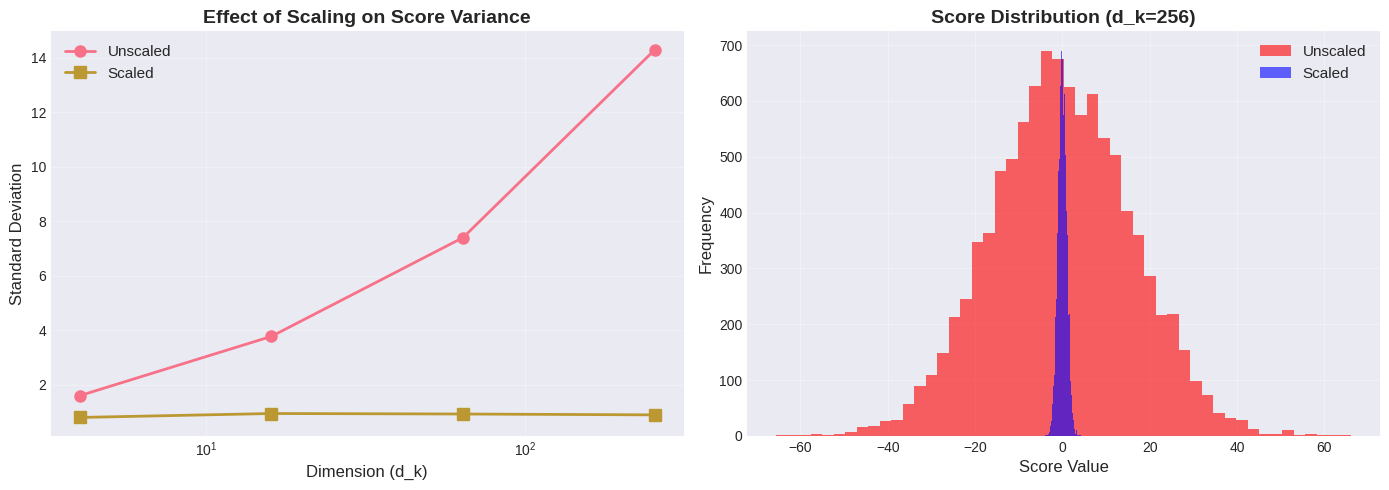


Why scaling matters:
- Without scaling, variance grows with dimension
- Large scores lead to very sharp softmax distributions
- Sharp distributions cause vanishing gradients
- Scaling keeps variance stable regardless of dimension


In [9]:
# Create attention scores with different dimensions
dimensions = [4, 16, 64, 256]
results = {}

for d in dimensions:
    # Create random Q and K
    Q_test = np.random.randn(10, d)
    K_test = np.random.randn(10, d)
    
    # Compute unscaled scores
    scores_unscaled = np.matmul(Q_test, K_test.T)
    
    # Compute scaled scores
    scores_scaled = scores_unscaled / np.sqrt(d)
    
    results[d] = {
        'unscaled_mean': np.mean(scores_unscaled),
        'unscaled_std': np.std(scores_unscaled),
        'scaled_mean': np.mean(scores_scaled),
        'scaled_std': np.std(scores_scaled)
    }

# Visualize the effect
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

dims = list(results.keys())
unscaled_stds = [results[d]['unscaled_std'] for d in dims]
scaled_stds = [results[d]['scaled_std'] for d in dims]

ax1.plot(dims, unscaled_stds, 'o-', linewidth=2, markersize=8, label='Unscaled')
ax1.plot(dims, scaled_stds, 's-', linewidth=2, markersize=8, label='Scaled')
ax1.set_xlabel('Dimension (d_k)', fontsize=12)
ax1.set_ylabel('Standard Deviation', fontsize=12)
ax1.set_title('Effect of Scaling on Score Variance', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')

# Show distribution of scores for highest dimension
Q_demo = np.random.randn(100, 256)
K_demo = np.random.randn(100, 256)
scores_demo_unscaled = (Q_demo @ K_demo.T).flatten()
scores_demo_scaled = (scores_demo_unscaled / np.sqrt(256))

ax2.hist(scores_demo_unscaled, bins=50, alpha=0.6, label='Unscaled', color='red')
ax2.hist(scores_demo_scaled, bins=50, alpha=0.6, label='Scaled', color='blue')
ax2.set_xlabel('Score Value', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Score Distribution (d_k=256)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nWhy scaling matters:")
print("- Without scaling, variance grows with dimension")
print("- Large scores lead to very sharp softmax distributions")
print("- Sharp distributions cause vanishing gradients")
print("- Scaling keeps variance stable regardless of dimension")

## Hands-On Activity: Building a Simple Transformer Encoder Layer

Now that we understand attention, let's build a simplified version of a complete transformer encoder layer. A full transformer encoder layer consists of:

1. Multi-head self-attention
2. Add & Norm (residual connection + layer normalization)
3. Feed-forward network
4. Add & Norm (residual connection + layer normalization)

We'll implement a simplified version to see how these components work together.

In [10]:
def layer_normalization(x, epsilon=1e-6):
    """
    Apply layer normalization.
    
    Parameters:
    -----------
    x : ndarray
        Input to normalize
    epsilon : float
        Small constant for numerical stability
    
    Returns:
    --------
    normalized : ndarray
        Normalized output
    """
    mean = np.mean(x, axis=-1, keepdims=True)
    std = np.std(x, axis=-1, keepdims=True)
    return (x - mean) / (std + epsilon)

def feed_forward_network(x, d_ff=32):
    """
    Simple feed-forward network (position-wise).
    In practice: Linear -> ReLU -> Linear
    
    For simplicity, we'll use random weights.
    """
    d_model = x.shape[-1]
    
    # First linear layer (expand)
    W1 = np.random.randn(d_model, d_ff) * 0.1
    b1 = np.zeros(d_ff)
    hidden = np.maximum(0, x @ W1 + b1)  # ReLU
    
    # Second linear layer (project back)
    W2 = np.random.randn(d_ff, d_model) * 0.1
    b2 = np.zeros(d_model)
    output = hidden @ W2 + b2
    
    return output

def transformer_encoder_layer(x, num_heads=2):
    """
    Simple transformer encoder layer.
    """
    # 1. Multi-head self-attention
    attn_output, attn_weights = multi_head_attention(x, x, x, num_heads=num_heads)
    
    # 2. Add & Norm (residual connection + layer normalization)
    x = layer_normalization(x + attn_output)
    
    # 3. Feed-forward network
    ff_output = feed_forward_network(x)
    
    # 4. Add & Norm
    output = layer_normalization(x + ff_output)
    
    return output, attn_weights

# Test the encoder layer
print("Testing Transformer Encoder Layer")
print("="*50)

# Create input
test_input = np.random.randn(6, 16)  # 6 tokens, 16 dimensions
print(f"Input shape: {test_input.shape}")

# Apply encoder layer
encoder_output, encoder_attn = transformer_encoder_layer(test_input, num_heads=2)
print(f"Output shape: {encoder_output.shape}")
print(f"\nOutput statistics:")
print(f"  Mean: {np.mean(encoder_output):.6f}")
print(f"  Std: {np.std(encoder_output):.6f}")
print(f"\nLayer normalization keeps values well-scaled!")

Testing Transformer Encoder Layer
Input shape: (6, 16)
Output shape: (6, 16)

Output statistics:
  Mean: 0.000000
  Std: 0.999999

Layer normalization keeps values well-scaled!


## The Complete Transformer Architecture

While we've focused on the attention mechanism, it's important to understand how it fits into the complete transformer architecture.

### Encoder-Decoder Structure

The original Transformer has:

**Encoder:**
- Input embedding + positional encoding
- Stack of N encoder layers (typically 6)
- Each layer: Multi-head self-attention + Feed-forward network

**Decoder:**
- Output embedding + positional encoding
- Stack of N decoder layers (typically 6)
- Each layer: Masked self-attention + Cross-attention + Feed-forward network

### Modern Variants

1. **BERT** (Encoder-only): Pre-training using masked language modeling
2. **GPT** (Decoder-only): Autoregressive language modeling
3. **T5** (Encoder-Decoder): Text-to-text framework
4. **Vision Transformer (ViT)**: Applies transformers to image patches

### Key Innovations

- **Positional Encoding**: Injects position information (transformers have no inherent notion of order)
- **Residual Connections**: Help gradients flow through deep networks
- **Layer Normalization**: Stabilizes training
- **Masked Attention**: Prevents looking at future tokens (in decoder)

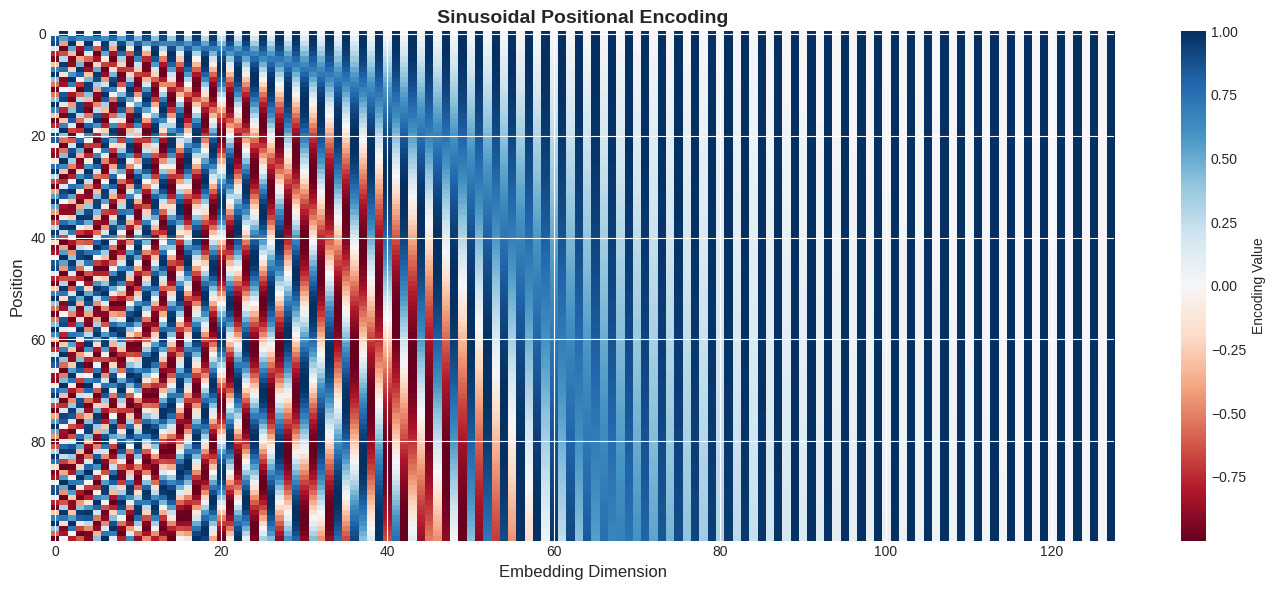


Positional Encoding Properties:
- Different frequencies for different dimensions
- Unique encoding for each position
- Allows model to learn relative positions
- Can handle sequences longer than seen during training


In [11]:
def positional_encoding(max_len, d_model):
    """
    Generate sinusoidal positional encodings.
    
    PE(pos, 2i) = sin(pos / 10000^(2i/d_model))
    PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))
    """
    pe = np.zeros((max_len, d_model))
    position = np.arange(0, max_len)[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)
    
    return pe

# Generate and visualize positional encodings
max_len = 100
d_model = 128
pe = positional_encoding(max_len, d_model)

plt.figure(figsize=(14, 6))
plt.imshow(pe, cmap='RdBu', aspect='auto')
plt.colorbar(label='Encoding Value')
plt.xlabel('Embedding Dimension', fontsize=12)
plt.ylabel('Position', fontsize=12)
plt.title('Sinusoidal Positional Encoding', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nPositional Encoding Properties:")
print("- Different frequencies for different dimensions")
print("- Unique encoding for each position")
print("- Allows model to learn relative positions")
print("- Can handle sequences longer than seen during training")

## Key Takeaways

Congratulations on completing Day 81! Here are the essential concepts you should take away:

1. **Attention Mechanism**:
   - Allows models to focus on relevant parts of the input
   - Uses Query, Key, and Value matrices to compute weighted combinations
   - The formula: $\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$

2. **Scaling Factor**:
   - Division by $\sqrt{d_k}$ prevents large dot products
   - Keeps gradients stable during training
   - Essential for training deep transformers

3. **Multi-Head Attention**:
   - Uses multiple attention mechanisms in parallel
   - Each head can learn different types of relationships
   - Increases model capacity and expressiveness

4. **Transformer Architecture**:
   - Built from attention layers, feed-forward networks, and normalization
   - Processes sequences in parallel (unlike RNNs)
   - Foundation for modern NLP models (BERT, GPT, T5, etc.)

5. **Practical Implications**:
   - Transformers have revolutionized NLP and are expanding to other domains
   - Understanding attention is crucial for working with modern AI systems
   - Attention weights provide interpretability into model decisions

## Further Resources

To deepen your understanding of transformers and attention mechanisms, explore these resources:

### Essential Papers
1. **"Attention Is All You Need"** - Vaswani et al. (2017)
   - The original transformer paper
   - https://arxiv.org/abs/1706.03762

2. **"BERT: Pre-training of Deep Bidirectional Transformers"** - Devlin et al. (2018)
   - Influential encoder-only transformer
   - https://arxiv.org/abs/1810.04805

3. **"Language Models are Few-Shot Learners"** - Brown et al. (2020)
   - GPT-3 paper showcasing decoder-only transformers
   - https://arxiv.org/abs/2005.14165

### Tutorials and Visualizations
4. **The Illustrated Transformer** - Jay Alammar
   - Excellent visual explanation
   - http://jalammar.github.io/illustrated-transformer/

5. **The Annotated Transformer** - Harvard NLP
   - Line-by-line implementation guide
   - http://nlp.seas.harvard.edu/2018/04/03/attention.html

### Implementations
6. **Hugging Face Transformers**
   - State-of-the-art pre-trained models
   - https://huggingface.co/transformers/

7. **PyTorch Transformer Tutorial**
   - Official PyTorch implementation
   - https://pytorch.org/tutorials/beginner/transformer_tutorial.html

### Additional Reading
8. **"Formal Algorithms for Transformers"** - Phuong & Hutter (2022)
   - Mathematical foundations
   - https://arxiv.org/abs/2207.09238

Keep exploring, and see you in the next lesson where we'll dive deeper into self-attention and positional encodings!